# Voice Gender Recognition Results' Analysis (Deep Learning)

In [1]:
%matplotlib inline

*Import libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

*Global parameters*

In [3]:
num_features = 20

*Paths*

In [4]:
figs_path = '../figs/'
data_path = '../data/'

## 1. Preprocessing

*Read datasets*

In [5]:
test_results = pd.read_csv(data_path + 'brains_test_{}d.csv'.format(num_features), index_col=0)
val_results = pd.read_csv(data_path + 'brains_val_{}d.csv'.format(num_features), index_col=0)
errors_results = pd.read_csv(data_path + 'brains_errors_{}d.csv'.format(num_features), index_col=0)
gradients_results = pd.read_csv(data_path + 'brains_gradients_{}d.csv'.format(num_features), index_col=0)

## 2. Analysis

*Sort results by accuracy in descending order*

In [6]:
test_results = test_results.sort_values(by=['accuracy'], ascending=False)
val_results = val_results.sort_values(by=['accuracy'], ascending=False)

*Select top 2 architectures*

In [7]:
top2_architectures_test = test_results.iloc[:2]
top2_architectures_val = val_results.iloc[:2]

*Select bottom 2 architectures*

In [8]:
bottom2_architectures_test = test_results.iloc[-2:]
bottom2_architectures_val = val_results.iloc[-2:]

*Select metrics to examine*

In [9]:
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc']

*Display key metrics in test set*

In [10]:
pd.concat([top2_architectures_test[metrics], bottom2_architectures_test[metrics]])

,accuracy,sensitivity,specificity,auc
0.90-20-9-9-10-2,0.979798,0.972257,0.987358,0.995973
0.90-20-10-7-10-2,0.979798,0.973518,0.986094,0.996032
0.50-20-7-5-8-2,0.910985,0.827238,0.994943,0.993014
0.50-20-7-7-8-2,0.909722,0.823455,0.996207,0.990409


*Display key metrics in validation set*

In [11]:
pd.concat([top2_architectures_val[metrics], bottom2_architectures_val[metrics]])

,accuracy,sensitivity,specificity,auc
0.90-20-9-9-9-2,0.988005,0.987358,0.988651,0.993870
0.90-20-7-7-8-2,0.987374,0.986094,0.988651,0.996548
0.50-20-7-7-8-2,0.918561,0.841972,0.994956,0.994313
0.50-20-7-5-8-2,0.911616,0.828066,0.994956,0.992737


*Render epochs*

In [12]:
epochs = np.linspace(1, errors_results.shape[1], errors_results.shape[1])

*Select learning curves in test set*

In [13]:
top2_errors_test = errors_results.loc[top2_architectures_test.index]
bottom2_errors_test = errors_results.loc[bottom2_architectures_test.index]
learning_curves_test = pd.concat([top2_errors_test, bottom2_errors_test])

*Build architecture label*

In [14]:
def build_architecture_label(architecture_id):
    scheme = architecture_id.split('-')
    learning_rate = scheme[0]
    design = scheme[1:]
    design_label = '-'.join(str(layer) for layer in design)
    label = 'L = [{}] and $\eta$ = {}'.format(design_label, learning_rate)
    return label

*Plot training curves in test set*

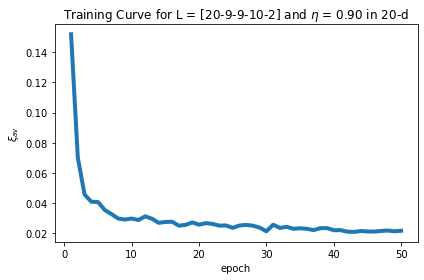

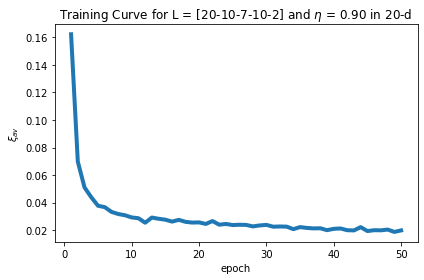

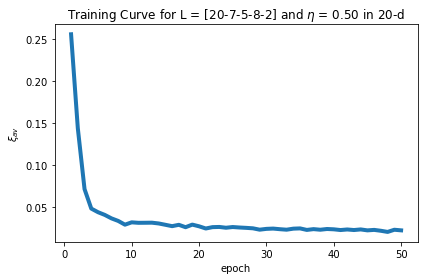

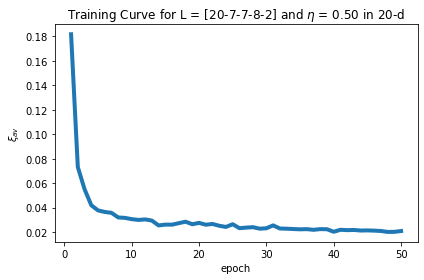

In [15]:
for architecture in learning_curves_test.iterrows():
    architecture_id = architecture[0]
    architecture_label = build_architecture_label(architecture_id)
    plt.figure()
    plt.plot(epochs, architecture[1], linewidth=4)
    plt.ylabel(r'$\xi_{av}$')
    plt.xlabel('epoch')
    plt.title(r'Training Curve for {} in {}-d'.format(architecture_label, num_features))
    plt.tight_layout()
    plt.savefig(figs_path + 'learning_curve_{}_{}d.pdf'.format(architecture_id, num_features))
    plt.show()

*Select gradients' curves in test set*

In [16]:
top2_gradients_test = gradients_results.loc[top2_architectures_test.index]
bottom2_gradients_test = gradients_results.loc[bottom2_architectures_test.index]
gradients_curves_test = pd.concat([top2_gradients_test, bottom2_gradients_test])

*Convert string to list of floats*

In [17]:
def string_to_float_list(string_list):
    string_list = string_list[1:-1].strip()
    string_list = string_list.replace('\n', '')
    string_list = re.sub(' +', ' ', string_list)
    return [float(item) for item in string_list.split(' ')]

*Plot gradients' curves in test set*

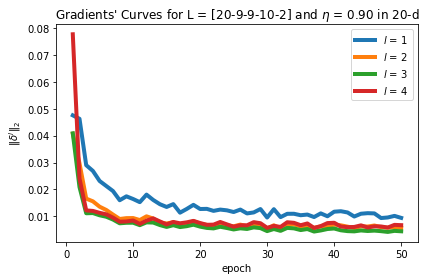

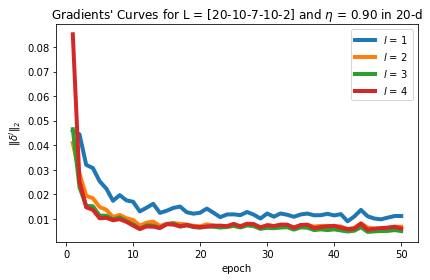

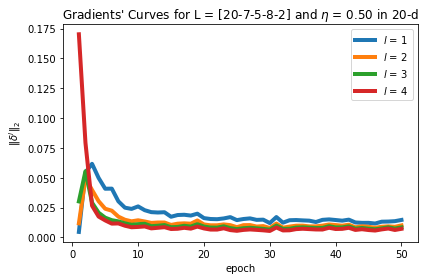

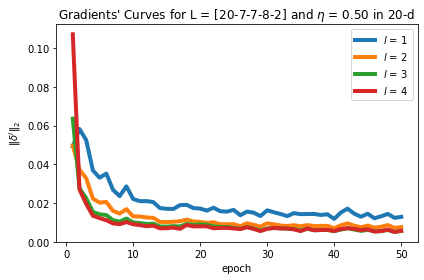

In [18]:
for architecture in gradients_curves_test.iterrows():
    architecture_id = architecture[0]
    architecture_label = build_architecture_label(architecture_id)
    plt.figure()
    for index, layer in enumerate(architecture[1]):
        if type(layer) == float and np.isnan(layer):
            break
        else:
            gradients = string_to_float_list(layer)
            plt.plot(epochs, gradients, linewidth=4, label='$l$ = {}'.format(index + 1))
    plt.ylabel(r'$\Vert\delta^l\Vert_{2}$')
    plt.xlabel('epoch')
    plt.title(r"Gradients' Curves for {} in {}-d".format(architecture_label, num_features))
    plt.legend()
    plt.tight_layout()
    plt.savefig(figs_path + 'gradients_curves_{}_{}d.pdf'.format(architecture_id, num_features))
    plt.show()

*Select ROC metrics to examine*

In [19]:
roc_metrics = ['fpr', 'tpr', 'auc']

*Select FPR and TPR values in test set*

In [20]:
top2_roc_test = test_results.loc[top2_architectures_test.index, roc_metrics]
bottom2_roc_test = test_results.loc[bottom2_architectures_test.index, roc_metrics]
roc_test = pd.concat([top2_roc_test, bottom2_roc_test])

*Plot ROC curves in test set*

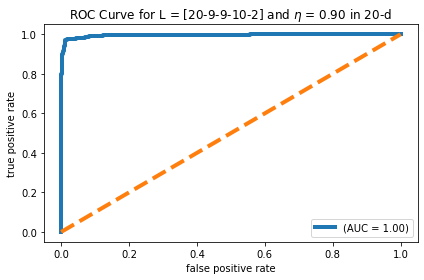

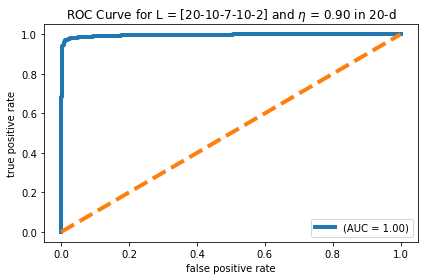

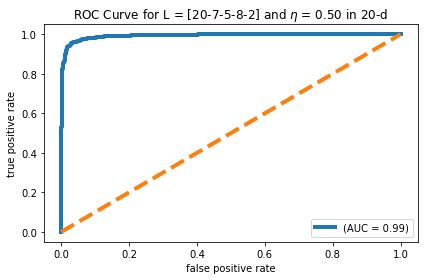

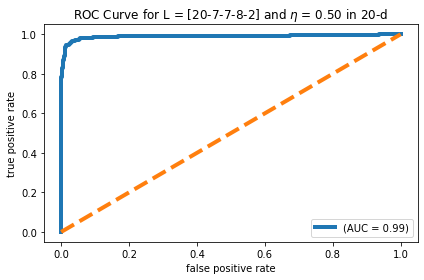

In [21]:
for architecture in roc_test.iterrows():
    architecture_id = architecture[0]
    architecture_label = build_architecture_label(architecture_id)
    fpr = string_to_float_list(architecture[1][0])
    tpr = string_to_float_list(architecture[1][1])
    auc = architecture[1][2]
    plt.figure()
    plt.plot(fpr, tpr, linewidth=4, label='(AUC = {:0.2f})'.format(auc))
    plt.plot([0.0, 1.0], [0.0, 1.0], '--', linewidth=4)
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.title(r'ROC Curve for {} in {}-d'.format(architecture_label, num_features))
    plt.legend()
    plt.tight_layout()
    plt.savefig(figs_path + 'roc_{}_{}d.pdf'.format(architecture_id, num_features))
    plt.show()